**Scalable Dstabase Midterm Fall 2022** \
CRN: 74178 \
Group 10 \
Ari Perez \
Pritam Channawar \
Manas Vani \

**Introduction**

For our Midterm Project, we’ve been tasked with performing an EDA (Exploratory Data
Analysis) on a dataset of our choosing. An EDA on a dataset involves cleaning the data and
performing initial investigations to check any hypotheses we may have. For this project we
performed many different operations on the data to show that we could manipulate them
using different Python libraries widely used in the Data Science field. Here we will discuss our
findings. Note: we attained our dataset from a General Social Survey on wages performed
between the years of 1974-2018.

**Problem definition**

To Perform Exploratory Data Analysis (EDA) in order to predict whether a
person’s wages are positively or negatively affected by a number of different categories i.e.
Occupation, Gender, Marital Status, Age, Year, Number of Children, Work Status, and Degree.
We hypothesize that Gender, Age, Year and Degree will be highly correlated with wages, but we
also seek to observe any other relationships we can glean from the data.

**Dataset**

Before we perform the EDA, we thought it instructive to describe the dataset: \
There is no Unstructured data in the dataset. \
Number of Attributes: 11 \
1. Year - the survey year
2. Base Income - the respondent&#39;s base income (in constant 1986 USD)
3. Age - the respondent&#39;s age in years
4. Occupation Code - respondent&#39;s occupation code (2010)
5. Occupation Category - recode of the occupation code into one of 11 main categories
6. Occupation Prestige - respondent&#39;s occupational prestige score (2010)
7. Number of Children - number of children (0-8)
8. Work Status - the work status of the respondent (full-time, part-time, temporarily not
working, unemployed (laid off), retired, school, housekeeper, other)
9. Gender - respondent&#39;s gender (male or female)
10. Degree Level - respondent&#39;s degree level (Less Than High School, High School, Junior
College, Bachelor, or Graduate)
11. Marital Status - respondent&#39;s marital status (Married, Widowed, Divorced, Separated,
Never Married)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from termcolor import colored
import itertools 
import sklearn       
import seaborn as sns 
from sklearn import datasets
import patsy
from patsy import dmatrices, dmatrix

#from google.colab import drive
#drive.mount('/content/drive')
import os

In [2]:
#pack = '/content/drive/MyDrive/mypackages'
#os.chdir(pack)

In [3]:
from google.colab import files
uploaded = files.upload()

Saving gss_wages.csv to gss_wages (1).csv


In [4]:
import checker as ck

## 1. Loading data into the dataframe

In [5]:
import io

df = pd.read_csv(io.BytesIO(uploaded['gss_wages.csv']))

In [6]:
#information: datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61697 entries, 0 to 61696
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  61697 non-null  int64  
 1   year        61697 non-null  int64  
 2   realrinc    37887 non-null  float64
 3   age         61478 non-null  float64
 4   occ10       58136 non-null  float64
 5   occrecode   58136 non-null  object 
 6   prestg10    57511 non-null  float64
 7   childs      61508 non-null  float64
 8   wrkstat     61676 non-null  object 
 9   gender      61697 non-null  object 
 10  educcat     61562 non-null  object 
 11  maritalcat  61670 non-null  object 
dtypes: float64(5), int64(2), object(5)
memory usage: 5.6+ MB


In [7]:
#disply first few rows
df.head()

,Unnamed: 0,year,realrinc,age,occ10,occrecode,prestg10,childs,wrkstat,gender,educcat,maritalcat
0,1,1974,4935.0,21.0,5620.0,Office and Administrative Support,25.0,0.0,School,Male,High School,Married
1,2,1974,43178.0,41.0,2040.0,Professional,66.0,3.0,Full-Time,Male,Bachelor,Married
2,3,1974,NaN,83.0,NaN,NaN,NaN,2.0,Housekeeper,Female,Less Than High School,Widowed
3,4,1974,NaN,69.0,NaN,NaN,NaN,2.0,Housekeeper,Female,Less Than High School,Widowed
4,5,1974,18505.0,58.0,5820.0,Office and Administrative Support,37.0,0.0,Full-Time,Female,High School,Never Married


In [8]:
#drop columns which has no use in future
del df['Unnamed: 0']

In [9]:
df.nunique()

year           30
realrinc      602
age            72
occ10         538
occrecode      11
prestg10       61
childs          9
wrkstat         8
gender          2
educcat         5
maritalcat      5
dtype: int64

In [10]:
df.describe()

,year,realrinc,age,occ10,prestg10,childs
count,61697.000000,37887.000000,61478.000000,58136.000000,57511.000000,61508.000000
mean,1996.073715,22326.359234,46.176177,4695.774081,43.060701,1.923457
std,12.794470,28581.794499,17.561065,2627.724076,12.987526,1.763569
min,1974.000000,227.000000,18.000000,10.000000,16.000000,0.000000
25%,1985.000000,8156.000000,32.000000,2710.000000,33.000000,0.000000
50%,1996.000000,16563.000000,44.000000,4720.000000,42.000000,2.000000
75%,2006.000000,27171.000000,59.000000,6230.000000,50.000000,3.000000
max,2018.000000,480144.472857,89.000000,9997.000000,80.000000,8.000000


## 2. Check the Data Types of your data columns.

In [11]:
# Let's clean up the column names and rename them to make them more user friendly

df = df.rename(columns={
    "year": "Year",
    "realrinc": "Base Income",
    "age": "Age",
    "occ10": "Occupation Code",
    "occrecode": "Occupation Category",
    "prestg10": "Occupation Prestige",
    "childs": "Number of Children",
    "wrkstat": "Work Status",
    "gender": "Gender",
    "educcat": "Degree Level",
    "maritalcat": "Marital Status",
  })


# We need to fix this data for processing by making all the categorical columns ints
df = df.astype({
 'Occupation Category': 'category',
 'Work Status': 'category',
 'Gender': 'category',
 'Marital Status': 'category',
 'Degree Level': 'category',
})


# Convert all categorical values to numeric and add these new "Code" columns to data frame

cat_columns = df.select_dtypes(['category']).columns
coded_cat_columns = cat_columns.map(lambda x: f'{x} Code')

# Need this list to do calculations later in the notebook
non_cat_columns = df.select_dtypes(exclude=['category']).columns

# Add an int column for every categorical column in the data frame
df[coded_cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
display(df[cat_columns].apply(lambda x: x.cat.codes))

display(df)
display(df.dtypes)

,Occupation Category,Work Status,Gender,Degree Level,Marital Status
0,5,5,1,2,1
1,7,0,1,0,1
2,-1,1,0,4,4
3,-1,1,0,4,4
4,5,0,0,2,2
...,...,...,...,...,...
61692,5,0,0,2,0
61693,8,3,0,2,1
61694,5,4,0,2,1
61695,7,4,1,2,1


,Year,Base Income,Age,Occupation Code,Occupation Category,Occupation Prestige,Number of Children,Work Status,Gender,Degree Level,Marital Status,Occupation Category Code,Work Status Code,Gender Code,Degree Level Code,Marital Status Code
0,1974,4935.0,21.0,5620.0,Office and Administrative Support,25.0,0.0,School,Male,High School,Married,5,5,1,2,1
1,1974,43178.0,41.0,2040.0,Professional,66.0,3.0,Full-Time,Male,Bachelor,Married,7,0,1,0,1
2,1974,NaN,83.0,NaN,NaN,NaN,2.0,Housekeeper,Female,Less Than High School,Widowed,-1,1,0,4,4
3,1974,NaN,69.0,NaN,NaN,NaN,2.0,Housekeeper,Female,Less Than High School,Widowed,-1,1,0,4,4
4,1974,18505.0,58.0,5820.0,Office and Administrative Support,37.0,0.0,Full-Time,Female,High School,Never Married,5,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61692,2018,NaN,37.0,5700.0,Office and Administrative Support,47.0,2.0,Full-Time,Female,High School,Divorced,5,0,0,2,0
61693,2018,7377.5,75.0,4720.0,Sales,28.0,4.0,Part-Time,Female,High School,Married,8,3,0,2,1
61694,2018,1589.0,67.0,5140.0,Office and Administrative Support,40.0,3.0,Retired,Female,High School,Married,5,4,0,2,1
61695,2018,NaN,72.0,1540.0,Professional,47.0,2.0,Retired,Male,High School,Married,7,4,1,2,1


Year                           int64
Base Income                  float64
Age                          float64
Occupation Code              float64
Occupation Category         category
Occupation Prestige          float64
Number of Children           float64
Work Status                 category
Gender                      category
Degree Level                category
Marital Status              category
Occupation Category Code        int8
Work Status Code                int8
Gender Code                     int8
Degree Level Code               int8
Marital Status Code             int8
dtype: object

In [12]:
#This function checks for any null values and displays the percent of null values present in a column. If the 
#add try-catch in this function for inputs in the parameters 

In [13]:
df.columns

Index(['Year', 'Base Income', 'Age', 'Occupation Code', 'Occupation Category',
       'Occupation Prestige', 'Number of Children', 'Work Status', 'Gender',
       'Degree Level', 'Marital Status', 'Occupation Category Code',
       'Work Status Code', 'Gender Code', 'Degree Level Code',
       'Marital Status Code'],
      dtype='object')

In [14]:
#use predefined checker function
try:
  ck.checker(df=df, delete="yes")
except:
  print ("Null values are deleted")

                     Total Null Values  Percentage of Null
Base Income                      23810            0.385918
Occupation Prestige               4186            0.067848
Occupation Code                   3561            0.057718
Occupation Category               3561            0.057718
Age                                219            0.003550
Number of Children                 189            0.003063
Degree Level                       135            0.002188
Marital Status                      27            0.000438
Work Status                         21            0.000340

Null values have been deleted


In [15]:
def cdf_plotting(df, *args):

    for arg in args:
        ## iterating over args - which is list of numerical columns that are passed through the function call 
        new_df = pd.melt(df, value_vars=arg) 
        plot = sns.FacetGrid(new_df, col="variable", sharex=False, sharey=False)
        plot = plot.map(sns.ecdfplot, 'value')

In [16]:
num_cols = ['Year', 'Base Income', 'Age', 'Occupation Code', 'Occupation Prestige', 'Number of Children', 'Gender Code', 'Degree Level Code','Marital Status Code']

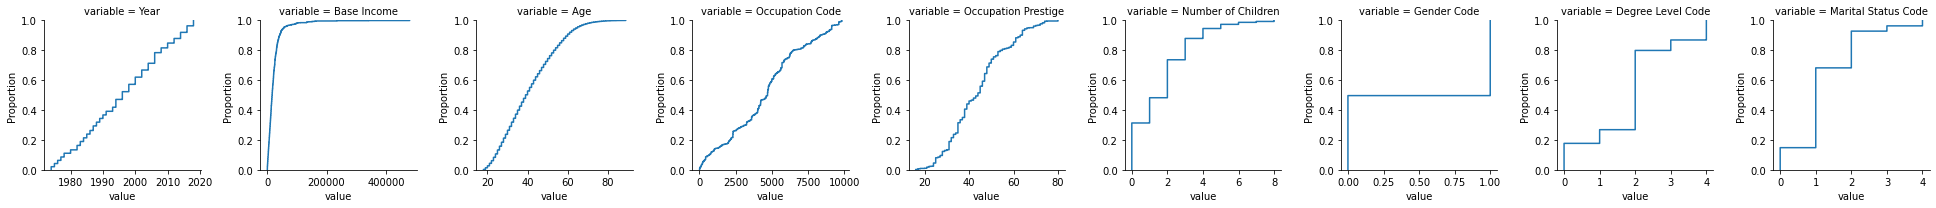

In [17]:
cdf_plotting(df, num_cols)

**The above graphs are the CDF of the different features in the dataset. We can integrate over a range of values to find the probability of that event taking place**


#### Dropping duplicate values 

In [18]:
#drop duplicate values if any
df.drop_duplicates()

display(df) # Looks like no rows were removed

,Year,Base Income,Age,Occupation Code,Occupation Category,Occupation Prestige,Number of Children,Work Status,Gender,Degree Level,Marital Status,Occupation Category Code,Work Status Code,Gender Code,Degree Level Code,Marital Status Code
0,1974,4935.0,21.0,5620.0,Office and Administrative Support,25.0,0.0,School,Male,High School,Married,5,5,1,2,1
1,1974,43178.0,41.0,2040.0,Professional,66.0,3.0,Full-Time,Male,Bachelor,Married,7,0,1,0,1
2,1974,18505.0,58.0,5820.0,Office and Administrative Support,37.0,0.0,Full-Time,Female,High School,Never Married,5,0,0,2,2
3,1974,22206.0,30.0,910.0,Business/Finance,45.0,0.0,School,Male,Bachelor,Married,1,5,1,0,1
4,1974,55515.0,48.0,230.0,Business/Finance,59.0,2.0,Full-Time,Male,Graduate,Married,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37180,2018,17025.0,54.0,3230.0,Professional,59.0,0.0,Full-Time,Female,Graduate,Married,7,0,0,1,1
37181,2018,4086.0,25.0,2710.0,Professional,58.0,0.0,Full-Time,Female,Bachelor,Never Married,7,0,0,0,2
37182,2018,14755.0,29.0,4760.0,Sales,31.0,0.0,Full-Time,Female,High School,Married,8,0,0,2,1
37183,2018,7377.5,75.0,4720.0,Sales,28.0,4.0,Part-Time,Female,High School,Married,8,3,0,2,1


,Year,Base Income,Age,Occupation Code,Occupation Category,Occupation Prestige,Number of Children,Work Status,Gender,Degree Level,Marital Status,Occupation Category Code,Work Status Code,Gender Code,Degree Level Code,Marital Status Code
0,1974,4935.0,21.0,5620.0,Office and Administrative Support,25.0,0.0,School,Male,High School,Married,5,5,1,2,1
1,1974,43178.0,41.0,2040.0,Professional,66.0,3.0,Full-Time,Male,Bachelor,Married,7,0,1,0,1
2,1974,18505.0,58.0,5820.0,Office and Administrative Support,37.0,0.0,Full-Time,Female,High School,Never Married,5,0,0,2,2
3,1974,22206.0,30.0,910.0,Business/Finance,45.0,0.0,School,Male,Bachelor,Married,1,5,1,0,1
4,1974,55515.0,48.0,230.0,Business/Finance,59.0,2.0,Full-Time,Male,Graduate,Married,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37180,2018,17025.0,54.0,3230.0,Professional,59.0,0.0,Full-Time,Female,Graduate,Married,7,0,0,1,1
37181,2018,4086.0,25.0,2710.0,Professional,58.0,0.0,Full-Time,Female,Bachelor,Never Married,7,0,0,0,2
37182,2018,14755.0,29.0,4760.0,Sales,31.0,0.0,Full-Time,Female,High School,Married,8,0,0,2,1
37183,2018,7377.5,75.0,4720.0,Sales,28.0,4.0,Part-Time,Female,High School,Married,8,3,0,2,1


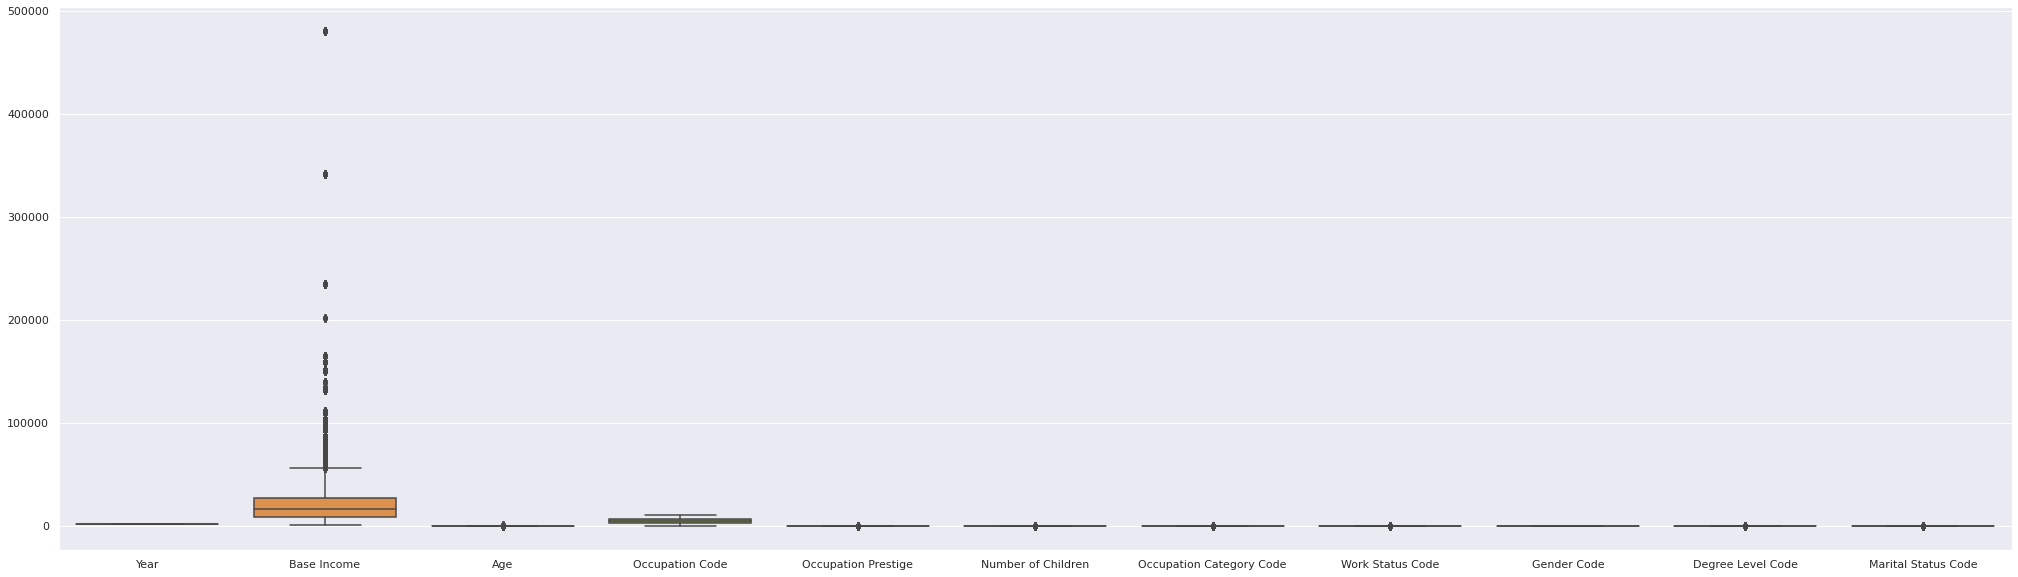

In [19]:
from scipy import stats

# Graph boxplot to visually inspect for any outliers

# df.boxplot(layout=(4,1))

# Widen the graph
sns.set(rc = {'figure.figsize':(35,10)}) 

sns.boxplot(data=df)

display(df)


,Year,Base Income,Age,Occupation Code,Occupation Prestige,Number of Children
0,1974,4935.0,21.0,5620.0,25.0,0.0
1,1974,43178.0,41.0,2040.0,66.0,3.0
2,1974,18505.0,58.0,5820.0,37.0,0.0
3,1974,22206.0,30.0,910.0,45.0,0.0
4,1974,55515.0,48.0,230.0,59.0,2.0
...,...,...,...,...,...,...
37180,2018,17025.0,54.0,3230.0,59.0,0.0
37181,2018,4086.0,25.0,2710.0,58.0,0.0
37182,2018,14755.0,29.0,4760.0,31.0,0.0
37183,2018,7377.5,75.0,4720.0,28.0,4.0


Base Income does  have outliers
Age does  have outliers
Number of Children does  have outliers
Removing Base Income


,Year,Base Income,Age,Occupation Code,Occupation Category,Occupation Prestige,Number of Children,Work Status,Gender,Degree Level,Marital Status,Occupation Category Code,Work Status Code,Gender Code,Degree Level Code,Marital Status Code
0,1974,4935.0,21.0,5620.0,Office and Administrative Support,25.0,0.0,School,Male,High School,Married,5,5,1,2,1
1,1974,43178.0,41.0,2040.0,Professional,66.0,3.0,Full-Time,Male,Bachelor,Married,7,0,1,0,1
2,1974,18505.0,58.0,5820.0,Office and Administrative Support,37.0,0.0,Full-Time,Female,High School,Never Married,5,0,0,2,2
3,1974,22206.0,30.0,910.0,Business/Finance,45.0,0.0,School,Male,Bachelor,Married,1,5,1,0,1
4,1974,55515.0,48.0,230.0,Business/Finance,59.0,2.0,Full-Time,Male,Graduate,Married,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37180,2018,17025.0,54.0,3230.0,Professional,59.0,0.0,Full-Time,Female,Graduate,Married,7,0,0,1,1
37181,2018,4086.0,25.0,2710.0,Professional,58.0,0.0,Full-Time,Female,Bachelor,Never Married,7,0,0,0,2
37182,2018,14755.0,29.0,4760.0,Sales,31.0,0.0,Full-Time,Female,High School,Married,8,0,0,2,1
37183,2018,7377.5,75.0,4720.0,Sales,28.0,4.0,Part-Time,Female,High School,Married,8,3,0,2,1


Removing Age


,Year,Base Income,Age,Occupation Code,Occupation Category,Occupation Prestige,Number of Children,Work Status,Gender,Degree Level,Marital Status,Occupation Category Code,Work Status Code,Gender Code,Degree Level Code,Marital Status Code
0,1974,4935.0,21.0,5620.0,Office and Administrative Support,25.0,0.0,School,Male,High School,Married,5,5,1,2,1
1,1974,43178.0,41.0,2040.0,Professional,66.0,3.0,Full-Time,Male,Bachelor,Married,7,0,1,0,1
2,1974,18505.0,58.0,5820.0,Office and Administrative Support,37.0,0.0,Full-Time,Female,High School,Never Married,5,0,0,2,2
3,1974,22206.0,30.0,910.0,Business/Finance,45.0,0.0,School,Male,Bachelor,Married,1,5,1,0,1
4,1974,55515.0,48.0,230.0,Business/Finance,59.0,2.0,Full-Time,Male,Graduate,Married,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37180,2018,17025.0,54.0,3230.0,Professional,59.0,0.0,Full-Time,Female,Graduate,Married,7,0,0,1,1
37181,2018,4086.0,25.0,2710.0,Professional,58.0,0.0,Full-Time,Female,Bachelor,Never Married,7,0,0,0,2
37182,2018,14755.0,29.0,4760.0,Sales,31.0,0.0,Full-Time,Female,High School,Married,8,0,0,2,1
37183,2018,7377.5,75.0,4720.0,Sales,28.0,4.0,Part-Time,Female,High School,Married,8,3,0,2,1


Removing Number of Children


,Year,Base Income,Age,Occupation Code,Occupation Category,Occupation Prestige,Number of Children,Work Status,Gender,Degree Level,Marital Status,Occupation Category Code,Work Status Code,Gender Code,Degree Level Code,Marital Status Code
0,1974,4935.0,21.0,5620.0,Office and Administrative Support,25.0,0.0,School,Male,High School,Married,5,5,1,2,1
1,1974,43178.0,41.0,2040.0,Professional,66.0,3.0,Full-Time,Male,Bachelor,Married,7,0,1,0,1
2,1974,18505.0,58.0,5820.0,Office and Administrative Support,37.0,0.0,Full-Time,Female,High School,Never Married,5,0,0,2,2
3,1974,22206.0,30.0,910.0,Business/Finance,45.0,0.0,School,Male,Bachelor,Married,1,5,1,0,1
4,1974,55515.0,48.0,230.0,Business/Finance,59.0,2.0,Full-Time,Male,Graduate,Married,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37180,2018,17025.0,54.0,3230.0,Professional,59.0,0.0,Full-Time,Female,Graduate,Married,7,0,0,1,1
37181,2018,4086.0,25.0,2710.0,Professional,58.0,0.0,Full-Time,Female,Bachelor,Never Married,7,0,0,0,2
37182,2018,14755.0,29.0,4760.0,Sales,31.0,0.0,Full-Time,Female,High School,Married,8,0,0,2,1
37183,2018,7377.5,75.0,4720.0,Sales,28.0,4.0,Part-Time,Female,High School,Married,8,3,0,2,1


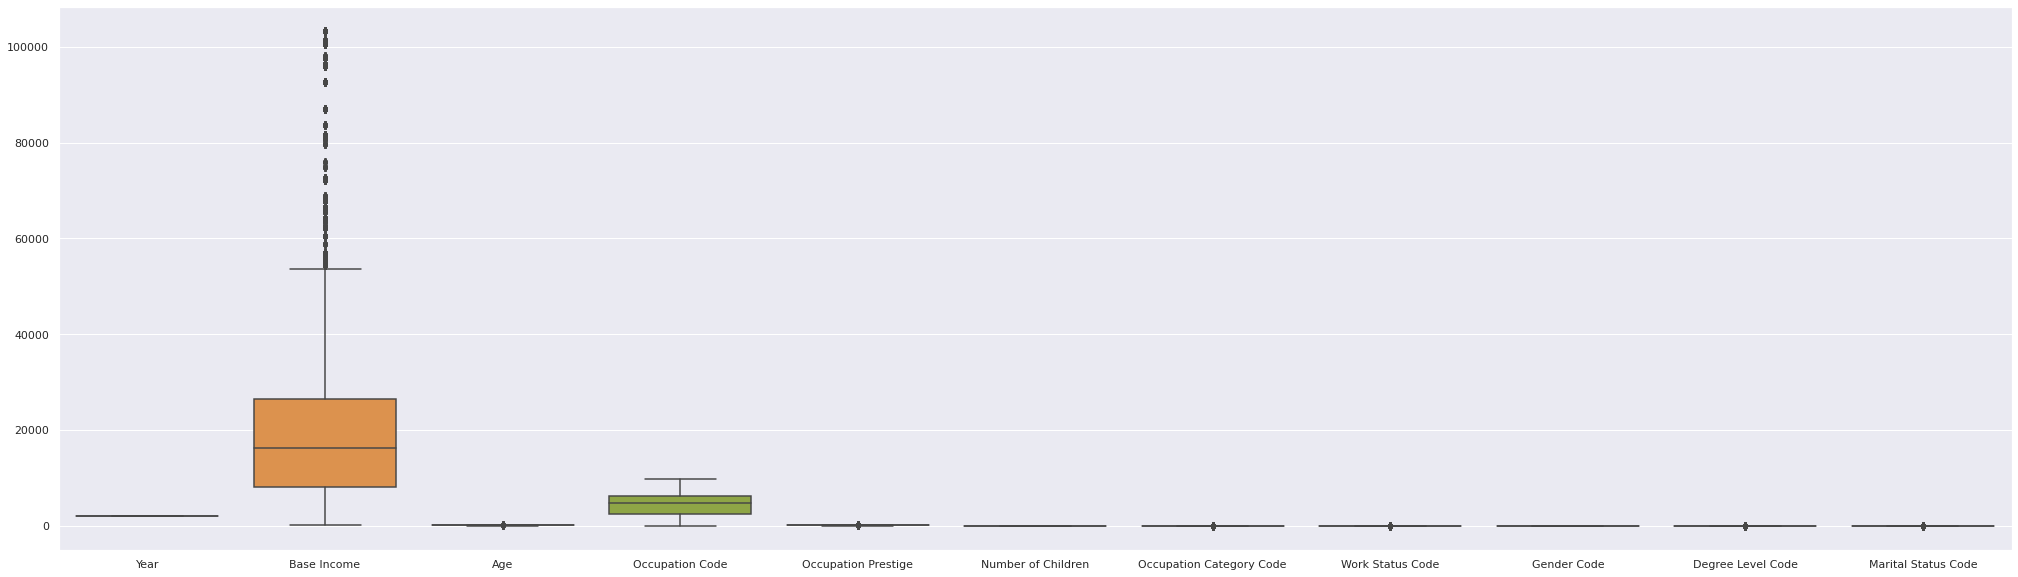

In [20]:
# Remove outliers by checking which values are more than 3 standard deviations from the mean

outliers = []

display(df[non_cat_columns])

for column in df[non_cat_columns]:
  is_outlier = len(np.unique(np.abs(stats.zscore(df[column])) < 3)) > 1
  if is_outlier:
    outlier_text = "" if is_outlier else "not"
    print(column, "does", outlier_text, "have outliers")
    outliers.append(column)

for outlier in outliers:
  print("Removing", outlier)
  df = df[(np.abs(stats.zscore(df[outlier])) < 3)]
  display(df)

sns.boxplot(data=df)

In [21]:
#using the non-cat columns 

In [22]:
#tests that the null hypothesis that the data was drwan from a normal distribution 
from scipy import stats
def shapiro_checker(df, *args, **kwargs):
  try:
    numerical_columns = [df.columns[i] 
            for i in range(1, df.shape[1]-1)  
            if df.iloc[:,i].dtype!='object']

    for i in numerical_columns:
        arr = df.groupby(numerical_columns)
        print (arr)

  except:
    ck.exceptBlock()
        ##working on this function - I need to find a way to get all the column values of a feature into arr to do math calculations 

### Plot features against each other using a pair plot 

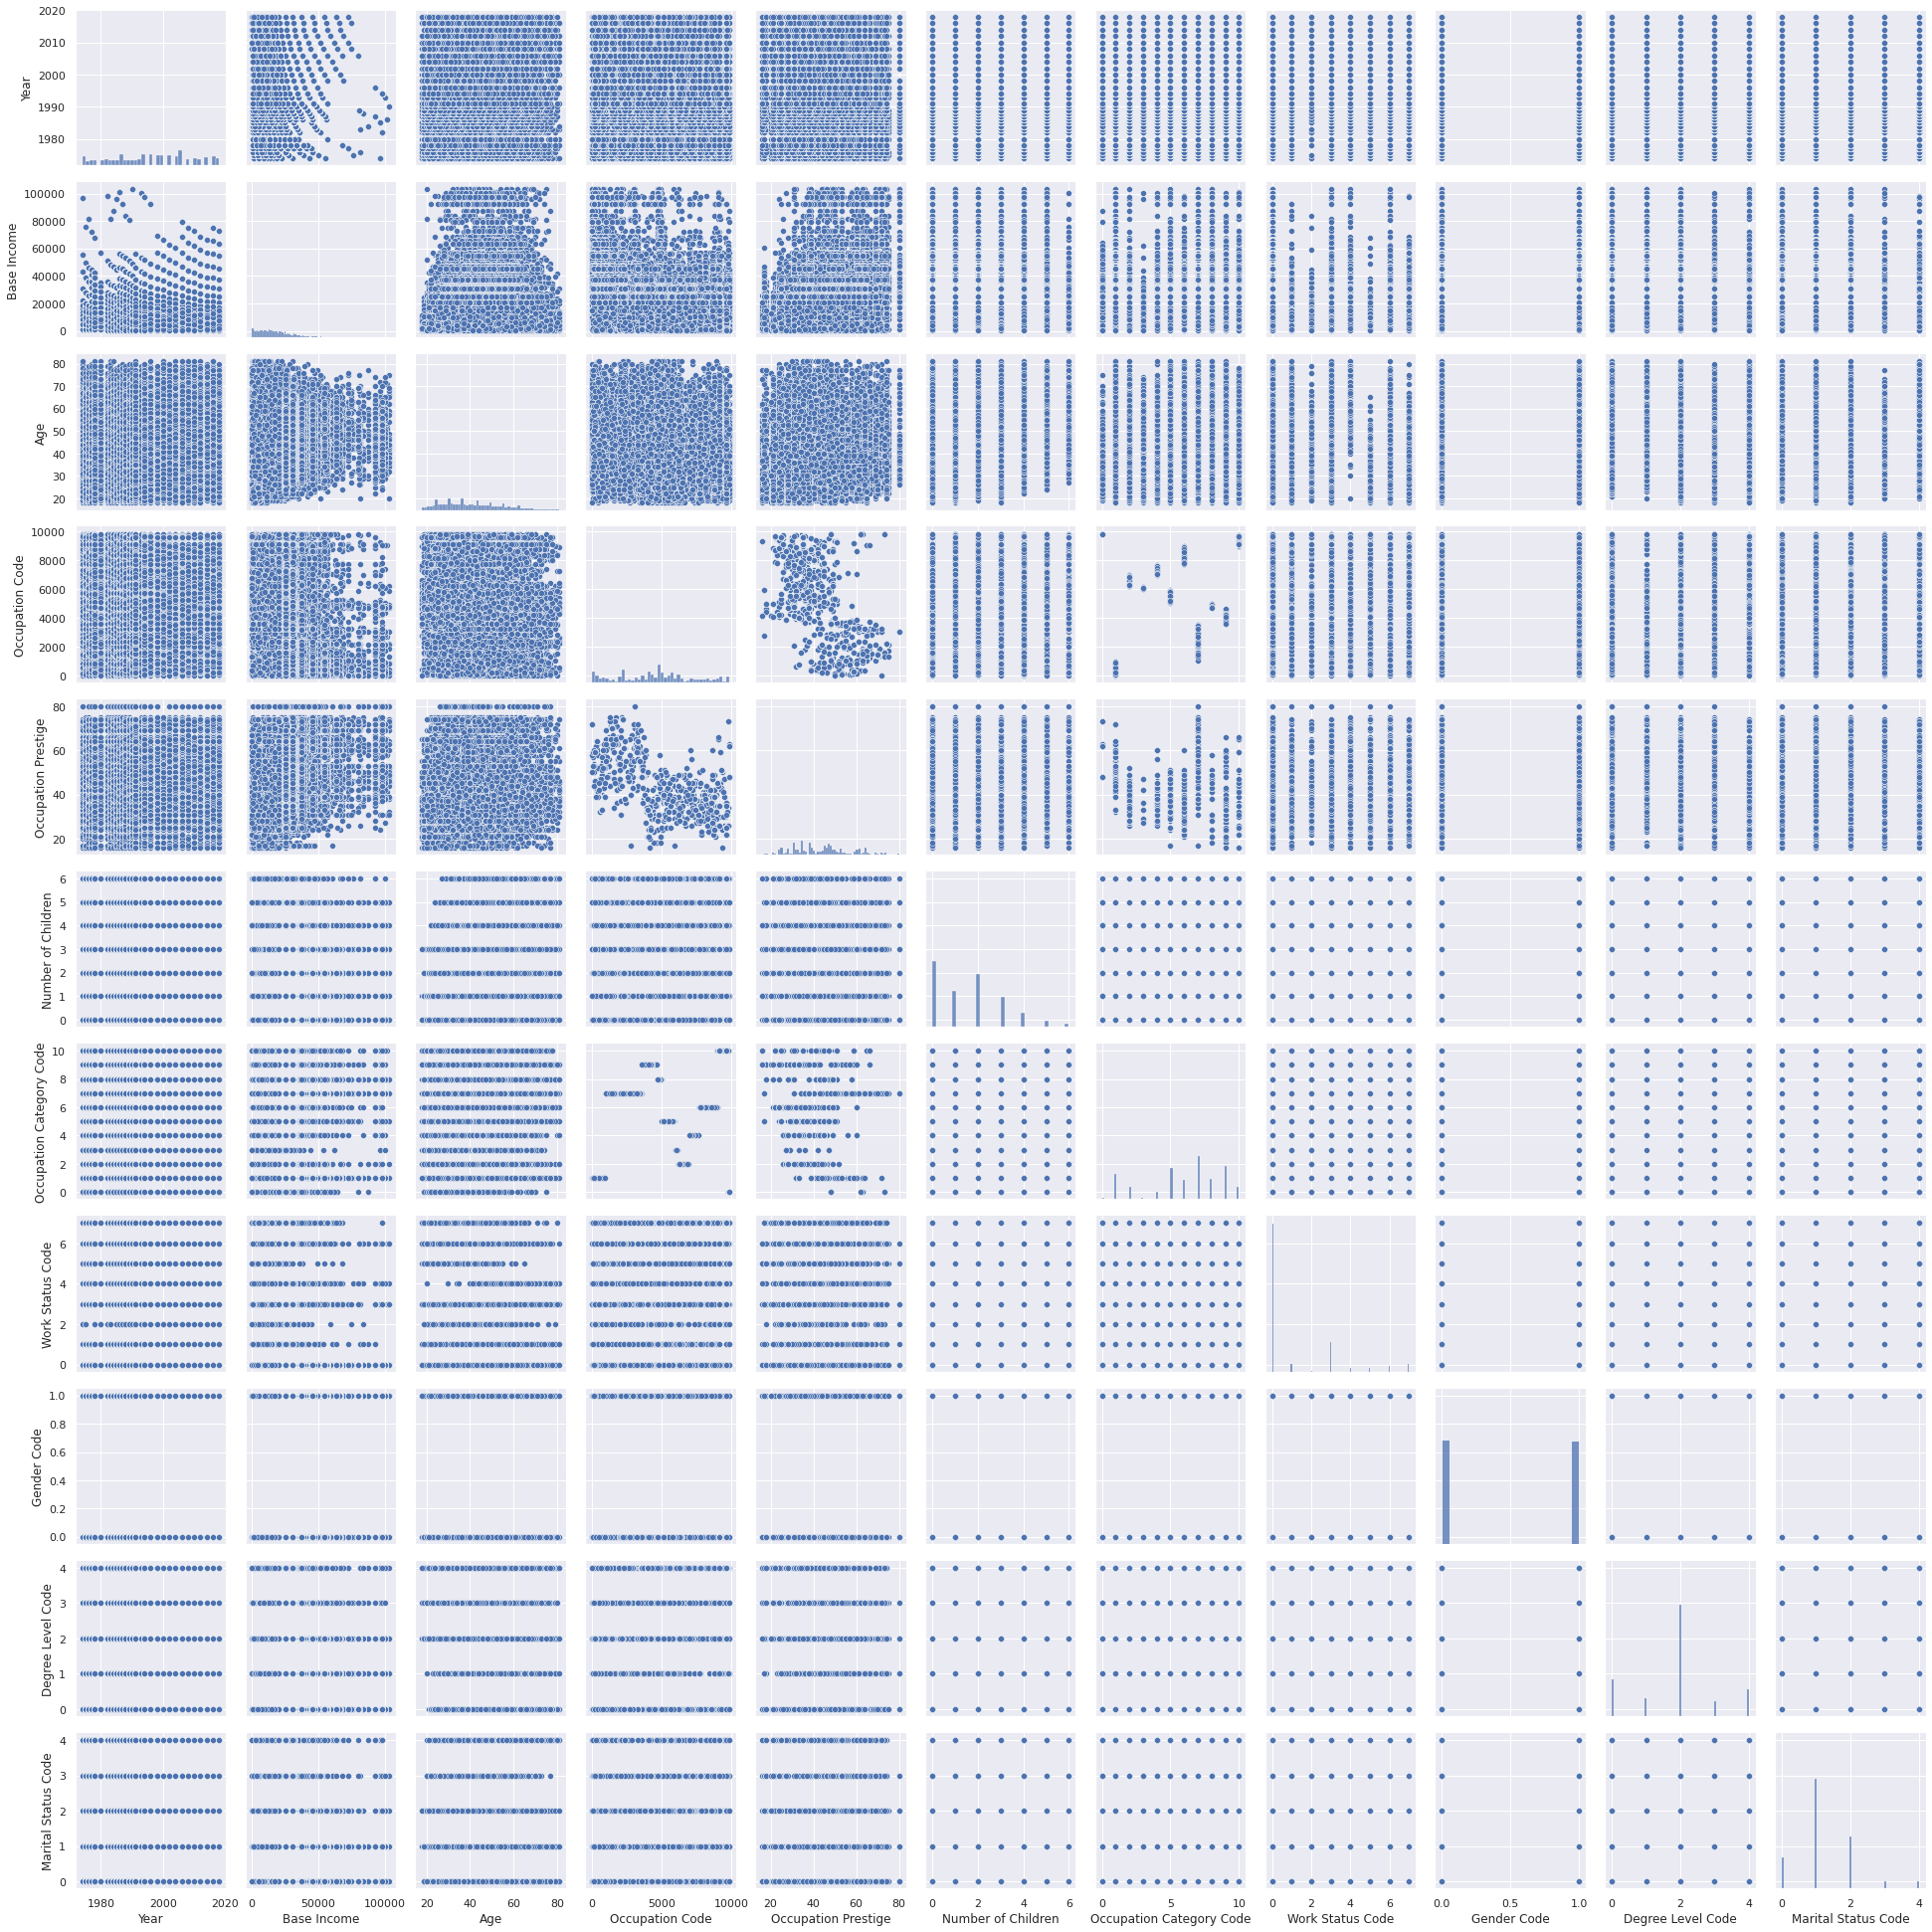

In [23]:
# Use seaborn to show pairplot

sns.pairplot(df)

## 7. Use a HeatMap for finding the correlation between the features

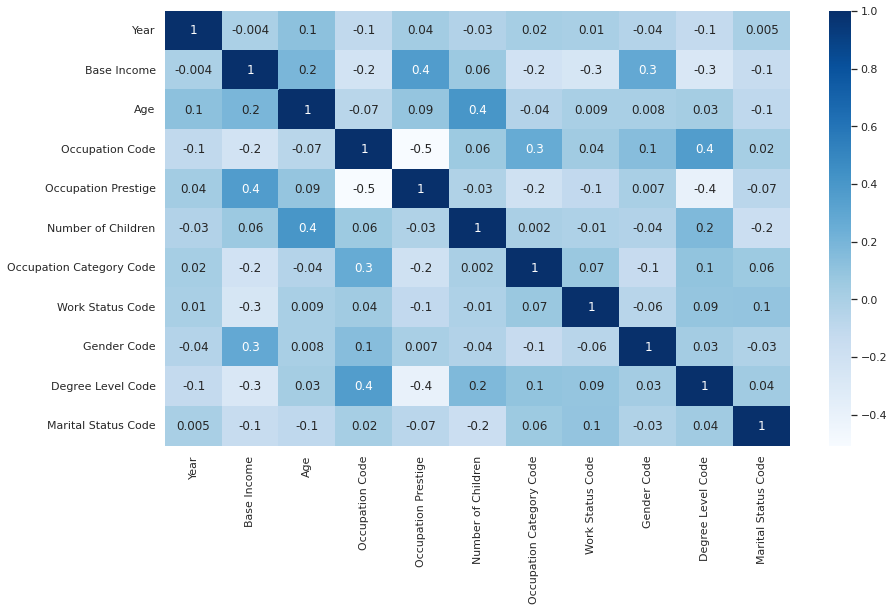

In [24]:
# Import pyplot to graph heatmap

plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

**Most highly correlated:**
*   Base Income vs Occupancy Prestige - 0.4
*   Age vs Number of Children - 0.4
*   Occupation(Code) vs Degree Level - 0.4
*   Base Income vs Gender - 0.3

**Least (directly) correlated:**
*   Age vs Work Status - 0.002

**Most inversely correlated:**
*   Occupation(Code) vs Occupation Prestige - -0.5 (makes sense)

**Also highly inversely correlated:**
*   Base Income vs Work Status - -0.4
*   Occupation Prestige vs Degree Level - -0.4
*   Marital Status vs Age - -0.3
*   Marital Status vs Number of Children - -0.3
*   Base Income vs Degree Level - -0.3

<Figure size 720x432 with 0 Axes>

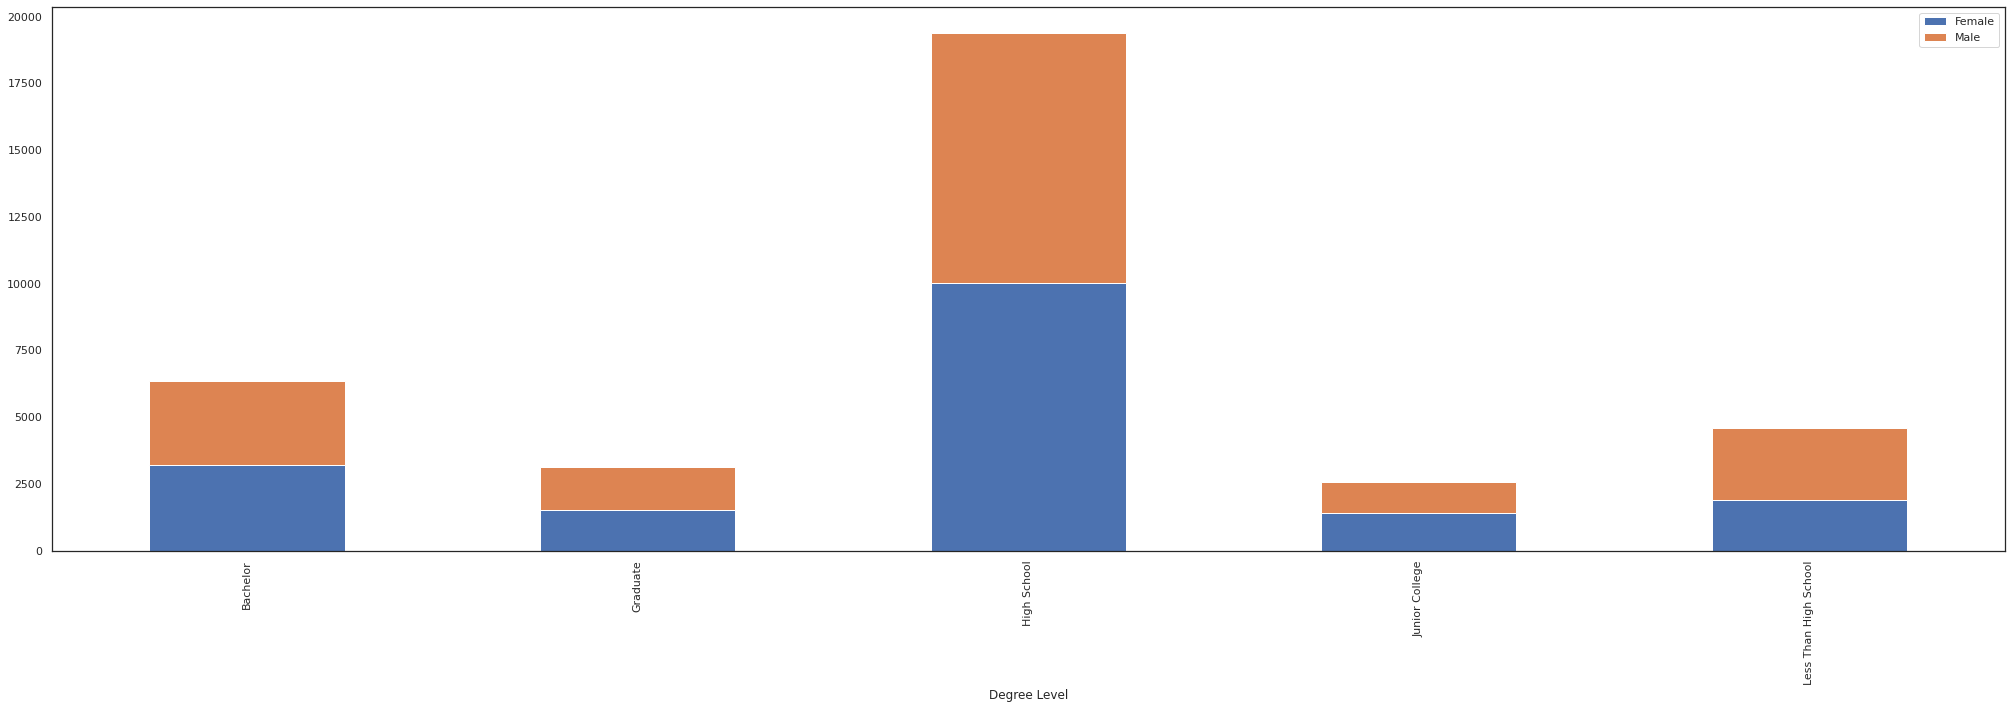

In [25]:
# Degree Level with gender analysis

plt.figure(figsize=(10,6))
types = df.groupby("Degree Level")['Gender'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

* Plot shows that most of the people are having highschool degree with almost similar count of male and female

## 8. Use a scatter plot to show the relationship between 2 variables.
#### Showing the scatterplots of the variables we hypothesized would be most correlated.

Base Income versus Gender (0.3)

[Text(0.5, 1.0, 'Base Income v Gender')]

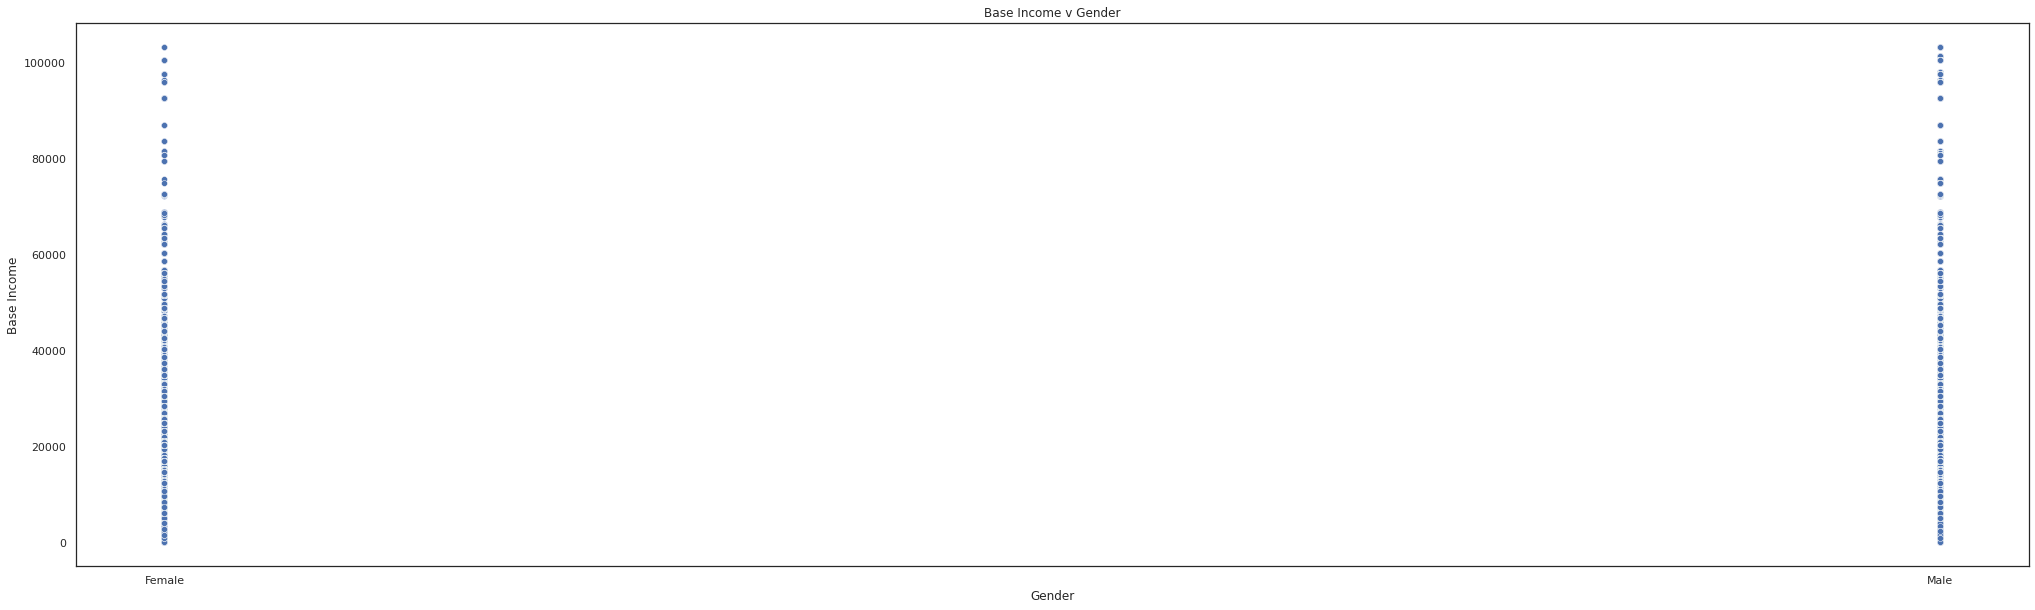

In [26]:
sns.scatterplot(data=df, x="Gender", y="Base Income").set(title="Base Income v Gender")

Base Income versus Age (0.2)

[Text(0.5, 1.0, 'Base Income v Age')]

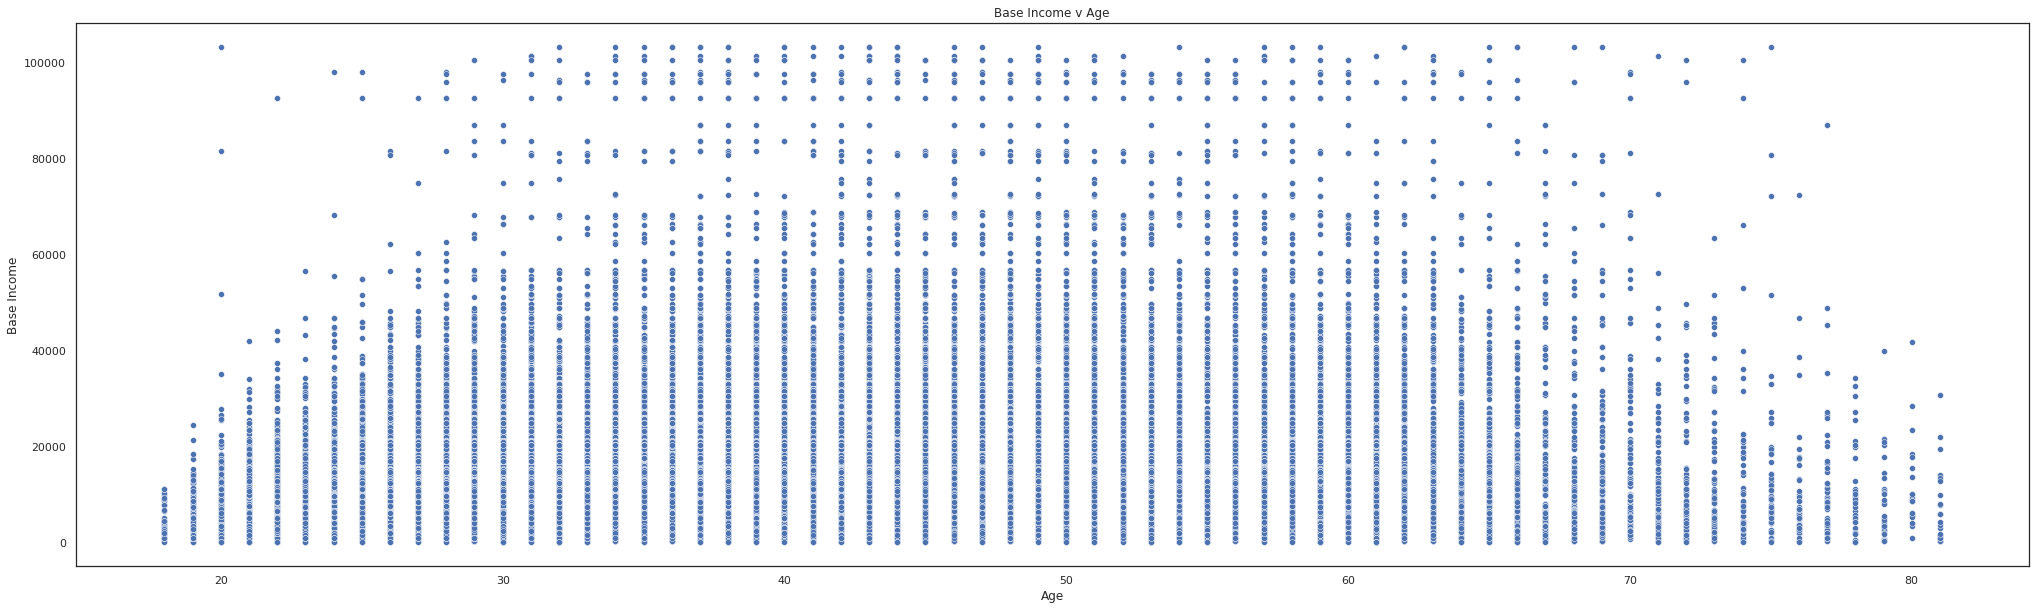

In [27]:
sns.scatterplot(data=df, x="Age", y="Base Income").set(title="Base Income v Age")

Base Income versus Year (-0.004 - Least correlated pair)

[Text(0.5, 1.0, 'Base Income v Year')]

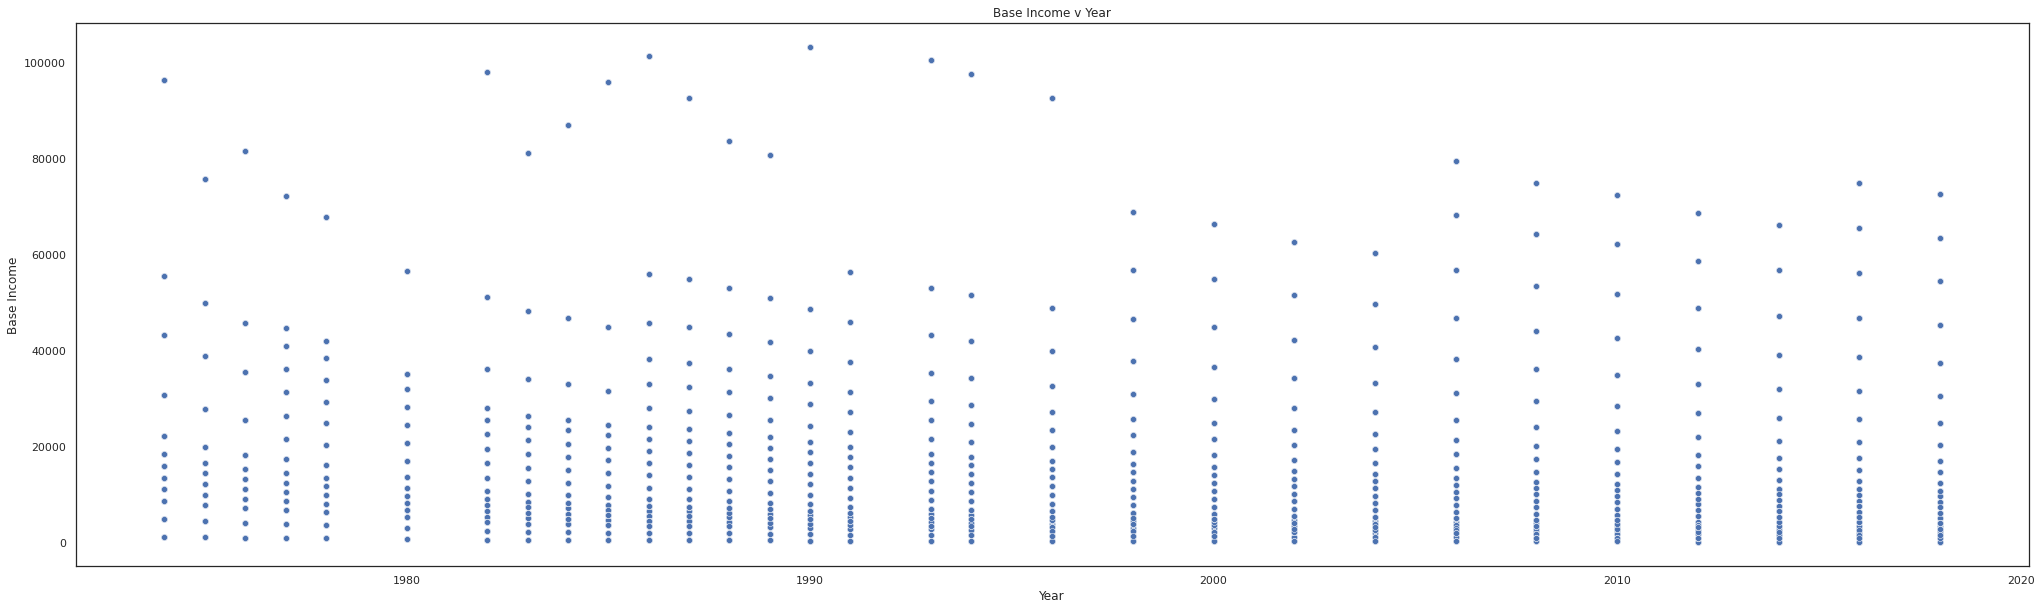

In [28]:
sns.scatterplot(data=df, x="Year", y="Base Income").set(title="Base Income v Year")

Base Income versus Degree Level (-0.3)

[Text(0.5, 1.0, 'Base Income v Degree Level')]

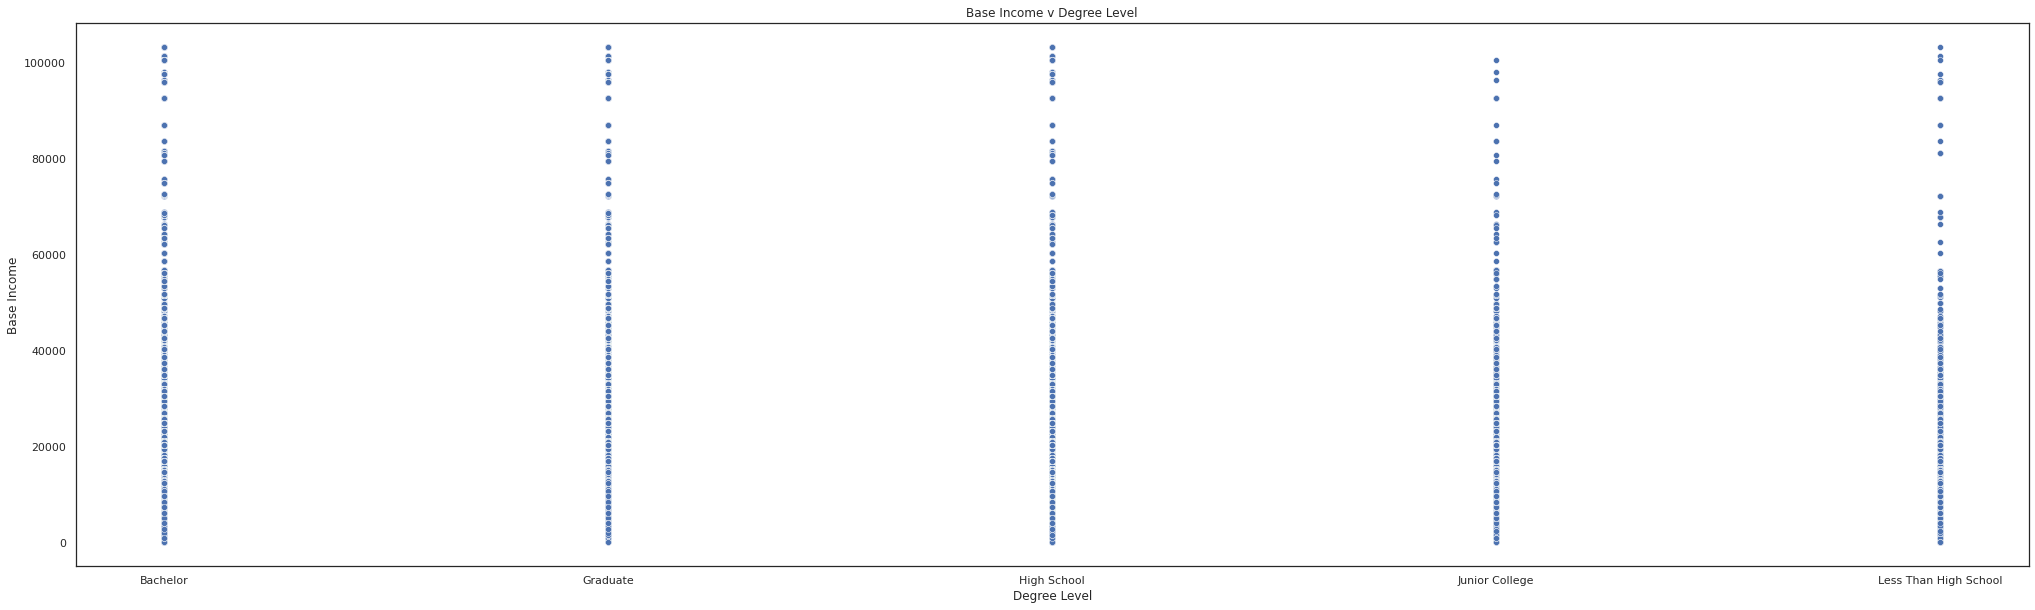

In [29]:
sns.scatterplot(data=df, x="Degree Level", y="Base Income").set(title="Base Income v Degree Level")

## 10. Slicing Data of a particular column value

Let's return Base Income, Age and Number of Children of all the rows with Marital Status Divorced

In [30]:
df[df['Marital Status']=='Never Married'].loc[:, ['Base Income', 'Age', 'Number of Children']] 

,Base Income,Age,Number of Children
2,18505.0,58.0,0.0
6,4935.0,22.0,0.0
8,11103.0,25.0,0.0
34,16038.0,37.0,0.0
44,1234.0,18.0,0.0
...,...,...,...
37167,4086.0,25.0,1.0
37169,17025.0,26.0,0.0
37177,37455.0,39.0,4.0
37178,908.0,66.0,0.0


In [31]:
#saperate list of numerical colums
numerical_columns = [df.columns[i] 
            for i in range(1, df.shape[1]-1)  
            if df.iloc[:,i].dtype!='object']
print('numerical_columns: {}'.format(numerical_columns))
#saperate list of catagorical colums
catagorical_columns = [df.columns[i] 
            for i in range(1, df.shape[1])  
            if df.iloc[:,i].dtype =='object']

print('catagorical_columns: {}'.format(catagorical_columns))

numerical_columns: ['Base Income', 'Age', 'Occupation Code', 'Occupation Category', 'Occupation Prestige', 'Number of Children', 'Work Status', 'Gender', 'Degree Level', 'Marital Status', 'Occupation Category Code', 'Work Status Code', 'Gender Code', 'Degree Level Code']
catagorical_columns: []


## Slicing Data of a particular column value (like year, month, filter values depending on the categorical data)



In [32]:
#Slicing Data of a particular column value (like year, month, filter values depending on the categorical data)
df.loc[df['Gender'] == 'Male']

,Year,Base Income,Age,Occupation Code,Occupation Category,Occupation Prestige,Number of Children,Work Status,Gender,Degree Level,Marital Status,Occupation Category Code,Work Status Code,Gender Code,Degree Level Code,Marital Status Code
0,1974,4935.0,21.0,5620.0,Office and Administrative Support,25.0,0.0,School,Male,High School,Married,5,5,1,2,1
1,1974,43178.0,41.0,2040.0,Professional,66.0,3.0,Full-Time,Male,Bachelor,Married,7,0,1,0,1
3,1974,22206.0,30.0,910.0,Business/Finance,45.0,0.0,School,Male,Bachelor,Married,1,5,1,0,1
4,1974,55515.0,48.0,230.0,Business/Finance,59.0,2.0,Full-Time,Male,Graduate,Married,1,0,1,1,1
7,1974,18505.0,23.0,7810.0,Production,28.0,1.0,Full-Time,Male,High School,Married,6,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37170,2018,54480.0,56.0,1550.0,Professional,50.0,0.0,Full-Time,Male,Bachelor,Married,7,0,1,0,1
37173,2018,37455.0,53.0,1460.0,Professional,70.0,2.0,Full-Time,Male,Bachelor,Married,7,0,1,0,1
37177,2018,37455.0,39.0,5510.0,Office and Administrative Support,29.0,4.0,Full-Time,Male,High School,Never Married,5,0,1,2,2
37178,2018,908.0,66.0,8530.0,Production,36.0,0.0,Housekeeper,Male,Bachelor,Never Married,6,1,1,0,2


In [33]:
#Slicing Data of a particular column value (like year, month, filter values depending on the categorical data)
df.loc[df['Occupation Code'] != 'Business/Finance']

,Year,Base Income,Age,Occupation Code,Occupation Category,Occupation Prestige,Number of Children,Work Status,Gender,Degree Level,Marital Status,Occupation Category Code,Work Status Code,Gender Code,Degree Level Code,Marital Status Code
0,1974,4935.0,21.0,5620.0,Office and Administrative Support,25.0,0.0,School,Male,High School,Married,5,5,1,2,1
1,1974,43178.0,41.0,2040.0,Professional,66.0,3.0,Full-Time,Male,Bachelor,Married,7,0,1,0,1
2,1974,18505.0,58.0,5820.0,Office and Administrative Support,37.0,0.0,Full-Time,Female,High School,Never Married,5,0,0,2,2
3,1974,22206.0,30.0,910.0,Business/Finance,45.0,0.0,School,Male,Bachelor,Married,1,5,1,0,1
4,1974,55515.0,48.0,230.0,Business/Finance,59.0,2.0,Full-Time,Male,Graduate,Married,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37180,2018,17025.0,54.0,3230.0,Professional,59.0,0.0,Full-Time,Female,Graduate,Married,7,0,0,1,1
37181,2018,4086.0,25.0,2710.0,Professional,58.0,0.0,Full-Time,Female,Bachelor,Never Married,7,0,0,0,2
37182,2018,14755.0,29.0,4760.0,Sales,31.0,0.0,Full-Time,Female,High School,Married,8,0,0,2,1
37183,2018,7377.5,75.0,4720.0,Sales,28.0,4.0,Part-Time,Female,High School,Married,8,3,0,2,1


In [34]:
#Slicing Data of a particular column value (like year, month, filter values depending on the categorical data)
df.loc[df['Year'] > 2000]

,Year,Base Income,Age,Occupation Code,Occupation Category,Occupation Prestige,Number of Children,Work Status,Gender,Degree Level,Marital Status,Occupation Category Code,Work Status Code,Gender Code,Degree Level Code,Marital Status Code
23062,2002,20335.25,25.0,2145.0,Professional,52.0,0.0,Full-Time,Female,High School,Divorced,7,0,0,2,0
23063,2002,51620.25,43.0,7700.0,Production,50.0,1.0,Full-Time,Male,Bachelor,Married,6,0,1,0,1
23064,2002,23463.75,30.0,5700.0,Office and Administrative Support,47.0,1.0,Full-Time,Female,High School,Separated,5,0,0,2,3
23065,2002,34413.50,55.0,3255.0,Professional,64.0,1.0,Full-Time,Female,Less Than High School,Divorced,7,0,0,4,0
23066,2002,28156.50,37.0,6355.0,Construction/Extraction,49.0,2.0,Full-Time,Male,Less Than High School,Divorced,2,0,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37180,2018,17025.00,54.0,3230.0,Professional,59.0,0.0,Full-Time,Female,Graduate,Married,7,0,0,1,1
37181,2018,4086.00,25.0,2710.0,Professional,58.0,0.0,Full-Time,Female,Bachelor,Never Married,7,0,0,0,2
37182,2018,14755.00,29.0,4760.0,Sales,31.0,0.0,Full-Time,Female,High School,Married,8,0,0,2,1
37183,2018,7377.50,75.0,4720.0,Sales,28.0,4.0,Part-Time,Female,High School,Married,8,3,0,2,1


In [35]:
#Representing data in matrix form.
arr = df.to_numpy()
type(arr)
print(arr)

[[1974 4935.0 21.0 ... 1 2 1]
 [1974 43178.0 41.0 ... 1 0 1]
 [1974 18505.0 58.0 ... 0 2 2]
 ...
 [2018 14755.0 29.0 ... 0 2 1]
 [2018 7377.5 75.0 ... 0 2 1]
 [2018 1589.0 67.0 ... 0 2 1]]


In [36]:
# Slicing first 2 matrices
print(arr[:2])

[[1974 4935.0 21.0 5620.0 'Office and Administrative Support' 25.0 0.0
  'School' 'Male' 'High School' 'Married' 5 5 1 2 1]
 [1974 43178.0 41.0 2040.0 'Professional' 66.0 3.0 'Full-Time' 'Male'
  'Bachelor' 'Married' 7 0 1 0 1]]


In [37]:
#[start:end:step]
print(arr[10:100:90])

[[1974 30841.0 53.0 4760.0 'Sales' 31.0 4.0 'Full-Time' 'Male'
  'High School' 'Married' 8 0 1 2 1]]


##  Select a slice or part of the data and display.



In [38]:
#13  Select a slice or part of the data and display.
#display half part of data
second_half = arr[len(arr)//2:]
print (second_half)

[[1996 48938.0 45.0 ... 1 0 1]
 [1996 15406.0 47.0 ... 1 1 0]
 [1996 15406.0 46.0 ... 1 4 4]
 ...
 [2018 14755.0 29.0 ... 0 2 1]
 [2018 7377.5 75.0 ... 0 2 1]
 [2018 1589.0 67.0 ... 0 2 1]]


In [39]:
first_half = arr[:len(arr)//2]
print (first_half)

[[1974 4935.0 21.0 ... 1 2 1]
 [1974 43178.0 41.0 ... 1 0 1]
 [1974 18505.0 58.0 ... 0 2 2]
 ...
 [1996 19938.0 22.0 ... 1 2 2]
 [1996 19938.0 54.0 ... 1 0 1]
 [1996 23563.0 46.0 ... 1 2 1]]


In [40]:
#craete array with first 50 records
dummyArray = arr[:10]
print(dummyArray.shape) # display shape

(10, 16)


In [41]:
#reshaping numpy array
dummyArray_re = dummyArray.reshape(20,8)
print("shape of an array is {}".format(dummyArray_re.shape))
print(dummyArray_re)

shape of an array is (20, 8)
[[1974 4935.0 21.0 5620.0 'Office and Administrative Support' 25.0 0.0
  'School']
 ['Male' 'High School' 'Married' 5 5 1 2 1]
 [1974 43178.0 41.0 2040.0 'Professional' 66.0 3.0 'Full-Time']
 ['Male' 'Bachelor' 'Married' 7 0 1 0 1]
 [1974 18505.0 58.0 5820.0 'Office and Administrative Support' 37.0 0.0
  'Full-Time']
 ['Female' 'High School' 'Never Married' 5 0 0 2 2]
 [1974 22206.0 30.0 910.0 'Business/Finance' 45.0 0.0 'School']
 ['Male' 'Bachelor' 'Married' 1 5 1 0 1]
 [1974 55515.0 48.0 230.0 'Business/Finance' 59.0 2.0 'Full-Time']
 ['Male' 'Graduate' 'Married' 1 0 1 1 1]
 [1974 4935.0 54.0 3940.0 'Service' 38.0 2.0 'Full-Time']
 ['Female' 'Less Than High School' 'Married' 9 0 0 4 1]
 [1974 4935.0 22.0 4020.0 'Service' 33.0 0.0 'Full-Time']
 ['Female' 'High School' 'Never Married' 9 0 0 2 2]
 [1974 18505.0 23.0 7810.0 'Production' 28.0 1.0 'Full-Time']
 ['Male' 'High School' 'Married' 6 0 1 2 1]
 [1974 11103.0 25.0 8640.0 'Production' 31.0 0.0 'Full-Ti

In [42]:
#transpose array
dummyArray_re_T = dummyArray_re.transpose()
print("shape of an array is {}".format(dummyArray_re_T.shape))
print(dummyArray_re_T)

shape of an array is (8, 20)
[[1974 'Male' 1974 'Male' 1974 'Female' 1974 'Male' 1974 'Male' 1974
  'Female' 1974 'Female' 1974 'Male' 1974 'Male' 1974 'Male']
 [4935.0 'High School' 43178.0 'Bachelor' 18505.0 'High School' 22206.0
  'Bachelor' 55515.0 'Graduate' 4935.0 'Less Than High School' 4935.0
  'High School' 18505.0 'High School' 11103.0 'Less Than High School'
  30841.0 'Less Than High School']
 [21.0 'Married' 41.0 'Married' 58.0 'Never Married' 30.0 'Married' 48.0
  'Married' 54.0 'Married' 22.0 'Never Married' 23.0 'Married' 25.0
  'Never Married' 59.0 'Married']
 [5620.0 5 2040.0 7 5820.0 5 910.0 1 230.0 1 3940.0 9 4020.0 9 7810.0 6
  8640.0 6 4710.0 8]
 ['Office and Administrative Support' 5 'Professional' 0
  'Office and Administrative Support' 0 'Business/Finance' 5
  'Business/Finance' 0 'Service' 0 'Service' 0 'Production' 0
  'Production' 0 'Sales' 0]
 [25.0 1 66.0 1 37.0 0 45.0 1 59.0 1 38.0 0 33.0 0 28.0 1 31.0 1 48.0 1]
 [0.0 2 3.0 0 0.0 2 0.0 0 2.0 1 2.0 4 0.0 2 

## Merging two Data Frames.

In [43]:
#converting numpy array to dataframes
df_first = pd.DataFrame(first_half, columns = ['Year', 'Base Income', 'Age', 'Occupation Code', 'Occupation Category',
       'Occupation Prestige', 'Number of Children', 'Work Status', 'Gender',
       'Degree Level', 'Marital Status', 'Occupation Category Code',
       'Work Status Code', 'Gender Code', 'Degree Level Code',
       'Marital Status Code'])
df_second = pd.DataFrame(second_half, columns = ['Year', 'Base Income', 'Age', 'Occupation Code', 'Occupation Category',
       'Occupation Prestige', 'Number of Children', 'Work Status', 'Gender',
       'Degree Level', 'Marital Status', 'Occupation Category Code',
       'Work Status Code', 'Gender Code', 'Degree Level Code',
       'Marital Status Code'])

In [44]:
# merge two dataframes left right and outer join
print('Result Left Join:\n', df_first.merge(df_second, how='left'))
print('Result Right Join:\n', df_first.merge(df_second, how='right'))
print('Result Outer Join:\n', df_first.merge(df_second, how='outer'))
# inner join
print('Result Inner Join:\n', df_first.merge(df_second))

Result Left Join:
        Year Base Income   Age Occupation Code  \
0      1974      4935.0  21.0          5620.0   
1      1974     43178.0  41.0          2040.0   
2      1974     18505.0  58.0          5820.0   
3      1974     22206.0  30.0           910.0   
4      1974     55515.0  48.0           230.0   
...     ...         ...   ...             ...   
18015  1996     23563.0  22.0          7750.0   
18016  1996     11781.0  33.0          4020.0   
18017  1996     19938.0  22.0          6230.0   
18018  1996     19938.0  54.0           205.0   
18019  1996     23563.0  46.0          6660.0   

                     Occupation Category Occupation Prestige  \
0      Office and Administrative Support                25.0   
1                           Professional                66.0   
2      Office and Administrative Support                37.0   
3                       Business/Finance                45.0   
4                       Business/Finance                59.0   
...     

#### Displaying the distribution of income from the dataset using Matplotlib


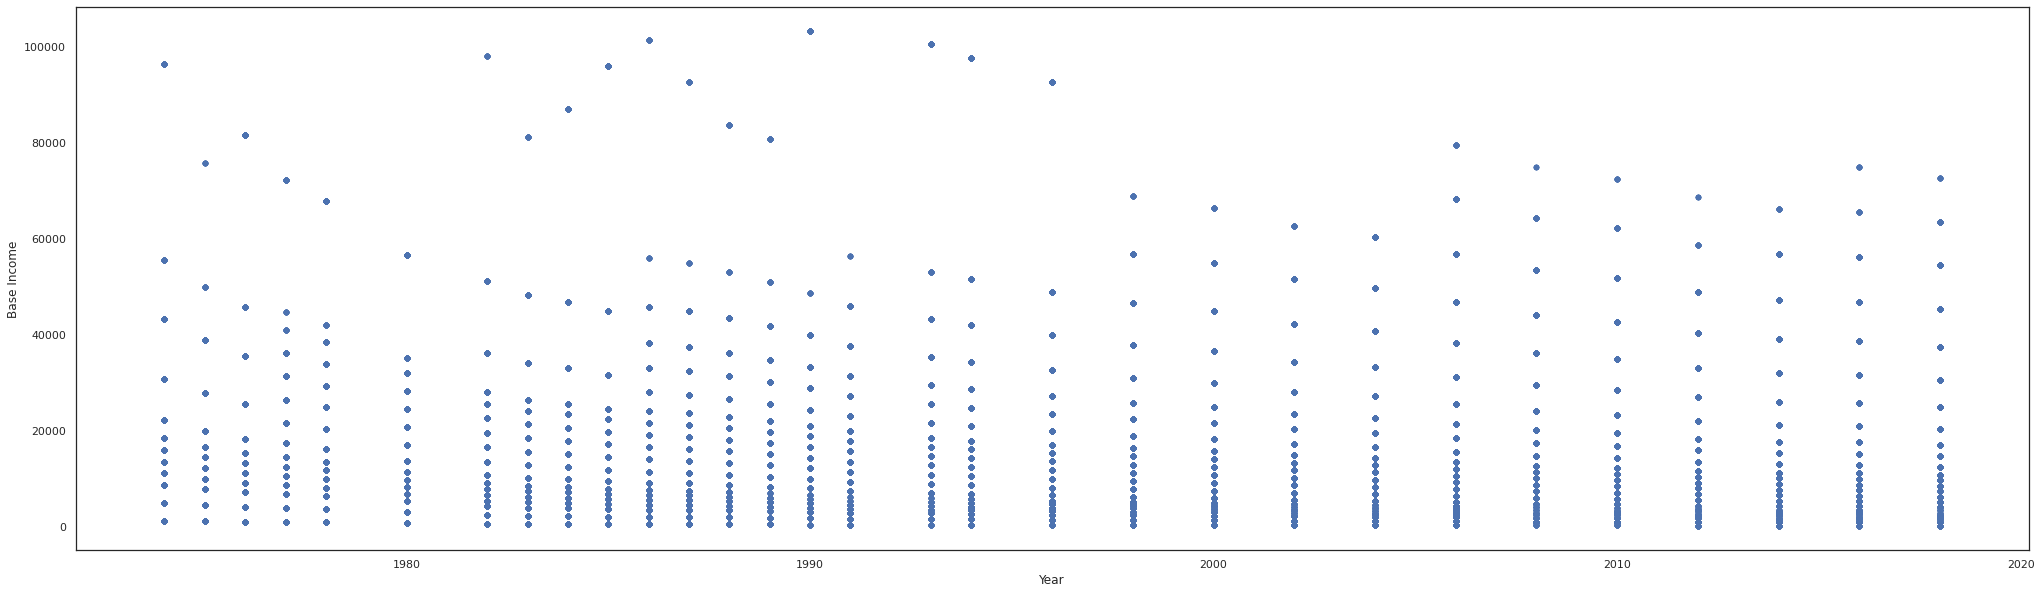

In [45]:
df.plot.scatter(x='Year', y='Base Income')

#### Plotting income greater than 100,000

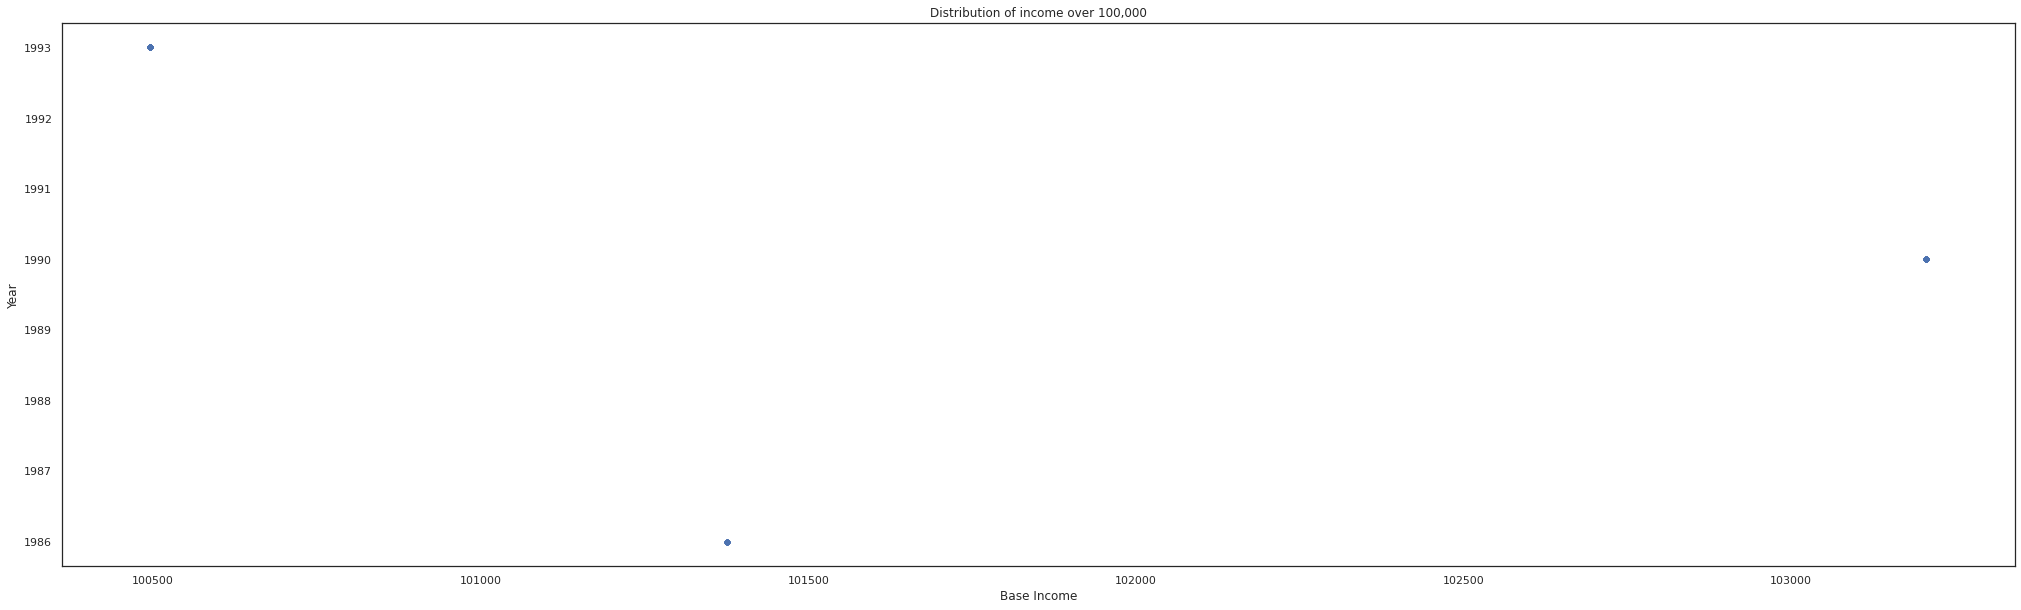

In [46]:
cond = {
    'Base Income': 100_000,
}

df.loc[(df['Base Income'] > cond['Base Income'])].plot.scatter(x='Base Income', y='Year', title='Distribution of income over 100,000')

In [47]:
#statistical functions
try:
  ck.statResult(df)
except:
  ck.exceptBlock()


Population Variance: 270491519.7616472
Population Standard Deviation: 16446.62639454205
Sample Variance: 270499025.2839914
Sample Standard Deviation: 16446.854571132786
Mode: 25582.5


**Conclusion**

After performing the EDA, we found that several factors, specifically Occupancy
Prestige, Work Status, Degree Level, and Gender are highly correlated with wages.
Interestingly, Number of Children and Year had the least correlation with wages, making our
hypotheses mostly correct, with Year being the only exception.